In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
n = 25
p = 0.7
G = nx.erdos_renyi_graph(n, p, seed=30000, directed=False)

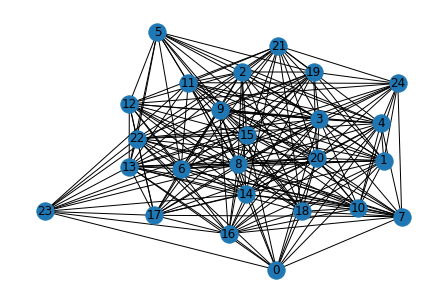

In [ ]:
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
G.number_of_edges()

215

In [ ]:
avg = 0

for x in range(20):
  G = nx.erdos_renyi_graph(30, 0.5, seed=None, directed=False)
  avg += G.number_of_edges()

avg /= 20

print("Average of edges:", avg)

Average of edges: 218.7


In [ ]:
avg = 0

for x in range(100000):
  G = nx.erdos_renyi_graph(30, 0.5, seed=None, directed=False)
  avg += G.number_of_edges()

avg /= 100000

print("Average of edges:", avg)


Average of edges: 217.46093


In [ ]:
#small number
sum_avg_deg = 0
n = 30
epoch = 10
sum_variance = 0

for x in range(epoch):
  G = nx.erdos_renyi_graph(n+1, 0.6, seed=None, directed=False)
  avg_deg = (2 * G.number_of_edges())/ n
  sum_avg_deg += avg_deg

  variance = 0
  for k in range(n):
    variance += (G.degree(k) - avg_deg) * (G.degree(k) - avg_deg)

  variance /= (n-1)
  sum_variance += variance 

sum_avg_deg /= epoch
sum_variance /= epoch

print("Average of degrees:", sum_avg_deg)
print("Average of variance:", sum_variance)


Average of degrees: 18.88
Average of variance: 6.833793103448277


In [ ]:
#large number
sum_avg_deg = 0
n = 30
epoch = 70000
sum_variance = 0

for x in range(epoch):
  G = nx.erdos_renyi_graph(n+1, 0.6, seed=None, directed=False)
  avg_deg = (2 * G.number_of_edges())/ n
  sum_avg_deg += avg_deg

  variance = 0
  for k in range(n):
    variance += pow((G.degree(k) - avg_deg),2)


  variance /= (n-1)
  sum_variance += variance 

sum_avg_deg /= epoch
sum_variance /= (epoch)

print("Average of degrees:", sum_avg_deg)
print("Average of variance:", sum_variance)

Average of degrees: 18.603479047619008
Average of variance: 7.343229556650177


Large number law was satisfied here with 1000 times simulation

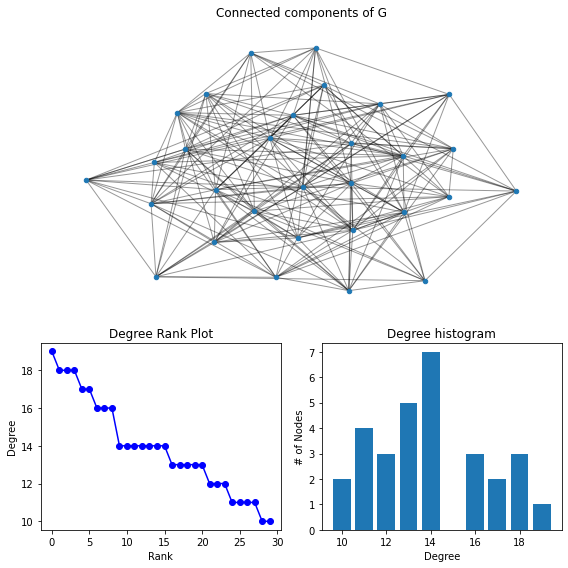

In [ ]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

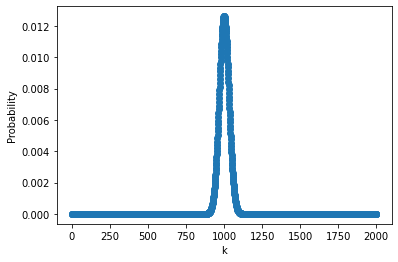

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

k = np.arange(0, 2001)

pmf = poisson.pmf(k, mu=1000)
pmf = np.round(pmf, 9)

#print(pmf, "\n")

#for val, prob in zip(k,pmf):
  #if(val % 3 == 0):
    #print(f"k-value {val} has probability = {prob}")

plt.plot(k, pmf, marker='o')
plt.xlabel('k')
plt.ylabel('Probability')

print()
plt.show()

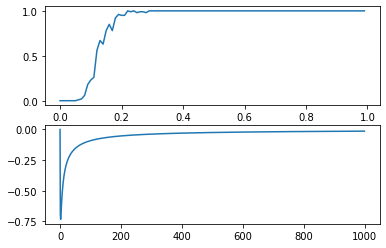

In [ ]:
array_p = []
array_connected = []

sum_connected = 0
p = 0.0
n = 30

for i in range(100):
  for x in range(100):
    G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)
    if(nx.is_connected(G)):
      sum_connected += 1
  array_p.append(p) 
  array_connected.append(sum_connected/100) 
  #print("p: ",p , "  p_connectivity:", (sum_connected/100))
  p += 0.01
  
  sum_connected = 0


#plt.plot(array_p, array_connected, marker='o')  


# log n / n
import math
array_result = []
array_x = []

for itr in range(1000):
  array_result.append(-2 * (math.log(itr+1)/(itr+1)))
  array_x.append(itr)

#plt.plot(array_x, array_result, marker='x')

fig, axs = plt.subplots(2)
axs[0].plot(array_p, array_connected)
axs[1].plot(array_x, array_result)